In [1]:
import numpy as np
import pandas as pd
import pickle
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    r2_score,
    mean_squared_error,
    mean_absolute_error,
)
from sklearn.model_selection import train_test_split

In [2]:
#load
with open('dataset_for_ML.pickle', 'rb') as f:
    dataset = pickle.load(f)

#load
with open('train.pickle', 'rb') as f:
    train_data = pickle.load(f)
    
#load
with open('./generator/index_list_wap_matched.pickle', 'rb') as f:
    index_list_wap_matched = pickle.load(f)

In [131]:
idx_rate_list = []
for id in range(0,200):
    data = dataset[id]
    idx_rate = (data['wap_60']/data['wap'] - data['target']/10000)
    idx_rate_list.append(idx_rate)

In [136]:
counter = 0
for i,a in enumerate(idx_rate_list):
    dataset[i]['index_ratio'] = a
    if counter == 0:
        print(dataset[i])
        counter += 1
    print(f'stock_id: {i}')

         stock_id  date_id  seconds_in_bucket       wap    target    wap_60  \
0               0        0                  0  1.000000 -3.029704  1.000517   
191             0        0                 10  0.999892  0.389814  1.000421   
382             0        0                 20  0.999842  4.220009  1.000148   
573             0        0                 30  1.000085  5.450249  1.000426   
764             0        0                 40  1.000317  3.169775  1.000261   
...           ...      ...                ...       ...       ...       ...   
5235780         0      480                440  0.998678  4.440546  0.999065   
5235980         0      480                450  0.998912 -0.609756  0.998941   
5236180         0      480                460  0.999429 -0.640154  0.999289   
5236380         0      480                470  0.999294  0.139475  0.999291   
5236580         0      480                480  0.999324  0.300407  0.999242   

            index  index_60  index_ratio  
0       

In [120]:
stock_0 = train_data[train_data['stock_id']==0]

In [121]:
stock_0

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,NaN,NaN,0.999812,60651.50,1.000026,8493.03,1.000000,-3.029704,0,0_0_0
191,0,0,10,1299772.70,1,1.000026,15261106.63,NaN,NaN,0.999812,13996.50,1.000026,23519.16,0.999892,0.389814,1,0_10_0
382,0,0,20,1299772.70,1,0.999919,15261106.63,NaN,NaN,0.999812,4665.50,0.999919,12131.60,0.999842,4.220009,2,0_20_0
573,0,0,30,1299772.70,1,1.000133,15261106.63,NaN,NaN,1.000026,55998.00,1.000133,46203.30,1.000085,5.450249,3,0_30_0
764,0,0,40,1218204.43,1,1.000455,15342674.90,NaN,NaN,1.000241,14655.95,1.000455,26610.45,1.000317,3.169775,4,0_40_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5236980,0,480,500,0.00,0,0.999017,42161928.97,0.999017,0.999017,0.999017,53827.20,0.999193,146071.08,0.999065,3.999472,26450,480_500_0
5237180,0,480,510,0.00,0,0.998842,42161928.97,0.998842,0.998842,0.998842,157865.40,0.999017,120926.08,0.998941,3.190041,26451,480_510_0
5237380,0,480,520,475513.69,-1,0.999193,41686415.27,0.999017,0.999017,0.999193,57596.67,0.999368,46780.58,0.999289,-0.169873,26452,480_520_0
5237580,0,480,530,475513.69,-1,0.999193,41686415.27,0.999017,0.999017,0.999193,156610.53,0.999368,122677.94,0.999291,3.110170,26453,480_530_0


In [138]:
df = pd.DataFrame()
for id in range(0,200):
    data = dataset[id]
    df = pd.concat([df,data])

df = df.sort_index()
    

            pred    target
pred    1.000000  0.673102
target  0.673102  1.000000


<Axes: xlabel='None', ylabel='target'>

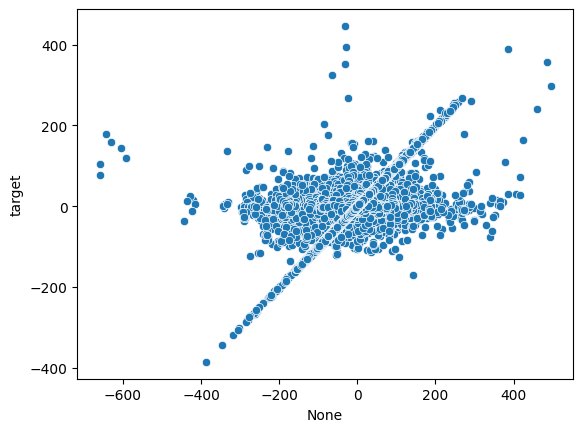

In [140]:
df_copy = df.copy()
wap_60 = df_copy['wap_60']
wap = df_copy['wap']
wap_ratio = wap_60/wap
index = df_copy['index']
index_60 = df_copy['index_60']
index_ratio_pred = index_60 / index
index_ratio = df_copy['index_ratio']
target = df_copy['target']
#print(target)

pred = (wap_ratio - index_ratio_pred)*10000

df = pd.DataFrame(data = pred, columns=['pred'])
df = pd.concat([df,target], axis=1)
print(df.corr())
df = pd.concat([df,wap_ratio], axis=1)
sns.scatterplot(x=pred, y=target)

In [143]:
df_copy

,stock_id,date_id,seconds_in_bucket,wap,target,wap_60,index,index_60,index_ratio
0,0,0,0,1.000000,-3.029704,1.000517,1.00000,1.000756,1.000820
1,1,0,0,1.000000,-5.519986,1.000268,1.00000,1.000756,1.000820
2,2,0,0,1.000000,-8.389950,0.999981,1.00000,1.000756,1.000820
3,3,0,0,1.000000,-4.010200,1.000419,1.00000,1.000756,1.000820
4,4,0,0,1.000000,-7.349849,1.000086,1.00000,1.000756,1.000821
...,...,...,...,...,...,...,...,...,...
5236775,195,480,480,1.000579,-1.389980,1.000328,0.99917,0.999098,0.999888
5236776,196,480,480,1.000800,1.319647,1.000819,0.99917,0.999098,0.999887
5236777,197,480,480,0.996233,-3.259778,0.995797,0.99917,0.999098,0.999888
5236778,198,480,480,0.999322,-2.020001,0.999008,0.99917,0.999098,0.999888


In [144]:
a = pd.DataFrame(data=[wap_ratio, index_ratio_pred, pred,target, df_copy['seconds_in_bucket']]).transpose()
a.columns = ['wap_ratio','index_ratio_pred','pred', 'target', 'seconds_in_bucket']
a

,wap_ratio,index_ratio_pred,pred,target,seconds_in_bucket
0,1.000517,1.000756,-2.390733,-3.029704,0.0
1,1.000268,1.000756,-4.880733,-5.519986,0.0
2,0.999981,1.000756,-7.750733,-8.389950,0.0
3,1.000419,1.000756,-3.370733,-4.010200,0.0
4,1.000086,1.000756,-6.700733,-7.349849,0.0
...,...,...,...,...,...
5236775,0.999749,0.999928,-1.789201,-1.389980,480.0
5236776,1.000019,0.999928,0.909195,1.319647,480.0
5236777,0.999562,0.999928,-3.657139,-3.259778,480.0
5236778,0.999686,0.999928,-2.422784,-2.020001,480.0


         wap_ratio  index_ratio_pred       pred     target  seconds_in_bucket
9359      1.000658          0.999824   8.349204   0.189543              490.0
9360      0.999367          0.999824  -4.561124  -1.620054              490.0
9361      1.000292          0.999824   4.685725  12.730360              490.0
9362      1.000637          0.999824   8.138932  -0.050068              490.0
9363      0.999991          0.999824   1.674873   2.800226              490.0
...            ...               ...        ...        ...                ...
5226975   1.000625          1.000721  -0.967200   1.599789              540.0
5226976   1.000883          1.000721   1.620543  -8.440018              540.0
5226977   1.000238          1.000721  -4.833754   5.149841              540.0
5226978   1.003381          1.000721  26.602121  -0.249743              540.0
5226979   0.997826          1.000721 -28.951673  -7.609725              540.0

[570192 rows x 5 columns]


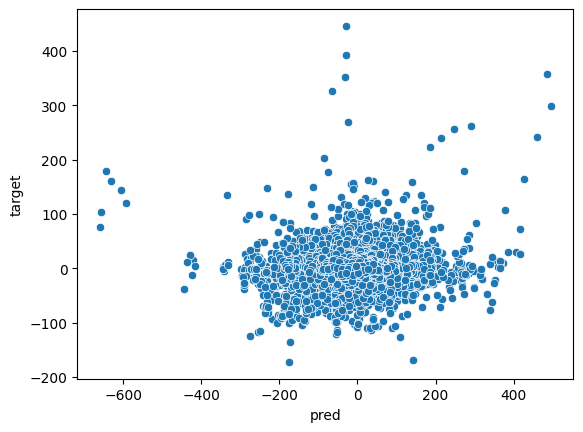

In [145]:
b= a.query('seconds_in_bucket > 480')
sns.scatterplot(x='pred', y='target', data=b)
print(b)

In [155]:
abs(b.target).mean()

5.863391964197542

<Axes: xlabel='pred', ylabel='target'>

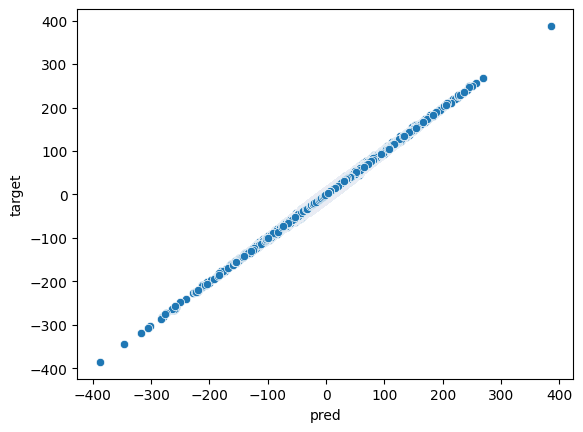

In [156]:
c= a.query('seconds_in_bucket <= 480')
sns.scatterplot(x='pred', y='target', data=c)

In [158]:
print(c)

         wap_ratio  index_ratio_pred      pred    target  seconds_in_bucket
0         1.000517          1.000756 -2.390733 -3.029704                0.0
1         1.000268          1.000756 -4.880733 -5.519986                0.0
2         0.999981          1.000756 -7.750733 -8.389950                0.0
3         1.000419          1.000756 -3.370733 -4.010200                0.0
4         1.000086          1.000756 -6.700733 -7.349849                0.0
...            ...               ...       ...       ...                ...
5236775   0.999749          0.999928 -1.789201 -1.389980              480.0
5236776   1.000019          0.999928  0.909195  1.319647              480.0
5236777   0.999562          0.999928 -3.657139 -3.259778              480.0
5236778   0.999686          0.999928 -2.422784 -2.020001              480.0
5236779   1.000318          0.999928  3.903123  4.299879              480.0

[4666368 rows x 5 columns]


In [157]:
abs(c['pred']-c['target']).mean()

0.9137237038727463

In [159]:
(5.863391964197542*570192 +0.9137237038727463*4666368)/5236560

1.452676994714657

In [122]:
dataset[0]

,stock_id,date_id,seconds_in_bucket,wap,target,wap_60,index,index_60,index_ratio
0,0,0,0,1.000000,-3.029704,1.000517,1.000000,1.000756,1.000820
191,0,0,10,0.999892,0.389814,1.000421,1.000403,1.000811,1.000490
382,0,0,20,0.999842,4.220009,1.000148,1.000527,1.000414,0.999884
573,0,0,30,1.000085,5.450249,1.000426,1.000534,1.000296,0.999796
764,0,0,40,1.000317,3.169775,1.000261,1.000584,1.000207,0.999627
...,...,...,...,...,...,...,...,...,...
5235780,0,480,440,0.998678,4.440546,0.999065,0.999231,0.999154,0.999943
5235980,0,480,450,0.998912,-0.609756,0.998941,0.999127,0.999196,1.000090
5236180,0,480,460,0.999429,-0.640154,0.999289,0.999178,0.999123,0.999924
5236380,0,480,470,0.999294,0.139475,0.999291,0.999134,0.999128,0.999983


In [123]:
dataset_0_copy = dataset[0].copy()
dataset_0_copy['new_index'] = index_list_wap_matched[:-6]
dataset_0_copy['new_index_60'] = index_list_wap_matched[6:]
dataset_0_copy['new_index_ratio'] = dataset_0_copy['new_index_60']/dataset_0_copy['new_index']
dataset_0_copy

,stock_id,date_id,seconds_in_bucket,wap,target,wap_60,index,index_60,index_ratio,new_index,new_index_60,new_index_ratio
0,0,0,0,1.000000,-3.029704,1.000517,1.000000,1.000756,1.000820,1.000000,1.000750,1.000750
191,0,0,10,0.999892,0.389814,1.000421,1.000403,1.000811,1.000490,1.000251,1.000732,1.000481
382,0,0,20,0.999842,4.220009,1.000148,1.000527,1.000414,0.999884,1.000441,1.000346,0.999905
573,0,0,30,1.000085,5.450249,1.000426,1.000534,1.000296,0.999796,1.000444,1.000346,0.999902
764,0,0,40,1.000317,3.169775,1.000261,1.000584,1.000207,0.999627,1.000584,1.000319,0.999736
...,...,...,...,...,...,...,...,...,...,...,...,...
5235780,0,480,440,0.998678,4.440546,0.999065,0.999231,0.999154,0.999943,0.998902,0.998867,0.999965
5235980,0,480,450,0.998912,-0.609756,0.998941,0.999127,0.999196,1.000090,0.998803,0.998888,1.000085
5236180,0,480,460,0.999429,-0.640154,0.999289,0.999178,0.999123,0.999924,0.998912,0.998818,0.999906
5236380,0,480,470,0.999294,0.139475,0.999291,0.999134,0.999128,0.999983,0.998836,0.998813,0.999977


            pred    target
pred    1.000000  0.641165
target  0.641165  1.000000


<Axes: xlabel='None', ylabel='target'>

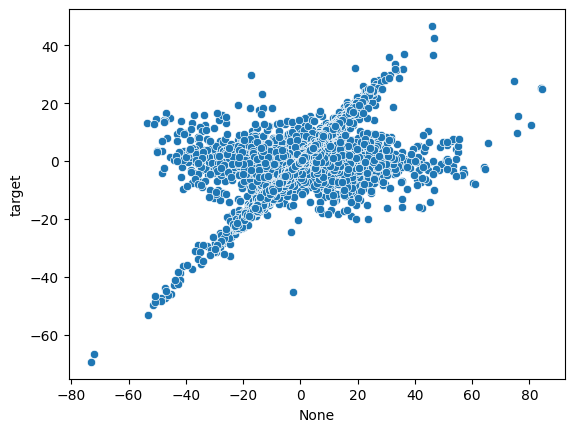

In [124]:
wap_60 = dataset_0_copy['wap_60']
wap = dataset_0_copy['wap']
wap_ratio = wap_60/wap
index = dataset_0_copy['new_index']
index_60 = dataset_0_copy['new_index_60']
index_ratio_pred = index_60 / index
index_ratio = dataset_0_copy['index_ratio']
target = dataset_0_copy['target']
#print(target)

pred = (wap_ratio - index_ratio_pred)*10000

df = pd.DataFrame(data = pred, columns=['pred'])
df = pd.concat([df,target], axis=1)
print(df.corr())
df = pd.concat([df,wap_ratio], axis=1)
sns.scatterplot(x=pred, y=target)

In [134]:
abs(train_data.query('seconds_in_bucket > 480')['target']).mean()

5.859045169834857

In [126]:
stock_0 = train_data[train_data['stock_id']==0]

In [127]:
a = pd.DataFrame(data=[wap_ratio, index_ratio_pred, pred,target, stock_0['seconds_in_bucket'], stock_0['imbalance_size'],stock_0['date_id']]).transpose()
a.columns = ['wap_ratio','index_ratio_pred','pred', 'target', 'seconds_in_bucket','imbalance_size','date_id']
a

,wap_ratio,index_ratio_pred,pred,target,seconds_in_bucket,imbalance_size,date_id
0,1.000517,1.000750,-2.333798,-3.029704,0.0,3180602.69,0.0
191,1.000529,1.000481,0.478292,0.389814,10.0,1299772.70,0.0
382,1.000306,0.999905,4.011997,4.220009,20.0,1299772.70,0.0
573,1.000341,0.999902,4.390911,5.450249,30.0,1299772.70,0.0
764,0.999944,0.999736,2.080745,3.169775,40.0,1218204.43,0.0
...,...,...,...,...,...,...,...
5236980,NaN,NaN,NaN,NaN,500.0,0.00,480.0
5237180,NaN,NaN,NaN,NaN,510.0,0.00,480.0
5237380,NaN,NaN,NaN,NaN,520.0,475513.69,480.0
5237580,NaN,NaN,NaN,NaN,530.0,475513.69,480.0


         wap_ratio  index_ratio_pred       pred    target  seconds_in_bucket  \
9359      1.000658          0.999056  16.019842  0.189543              490.0   
9550      0.999750          0.998734  10.161138  0.979900              500.0   
9741      0.998860          0.998629   2.305318  0.649691              510.0   
9932      0.998618          0.998428   1.899583  6.779432              520.0   
10123     0.999071          0.998798   2.734182  6.140471              530.0   
...            ...               ...        ...       ...                ...   
5236980        NaN               NaN        NaN       NaN              500.0   
5237180        NaN               NaN        NaN       NaN              510.0   
5237380        NaN               NaN        NaN       NaN              520.0   
5237580        NaN               NaN        NaN       NaN              530.0   
5237780        NaN               NaN        NaN       NaN              540.0   

         imbalance_size  date_id  
9359

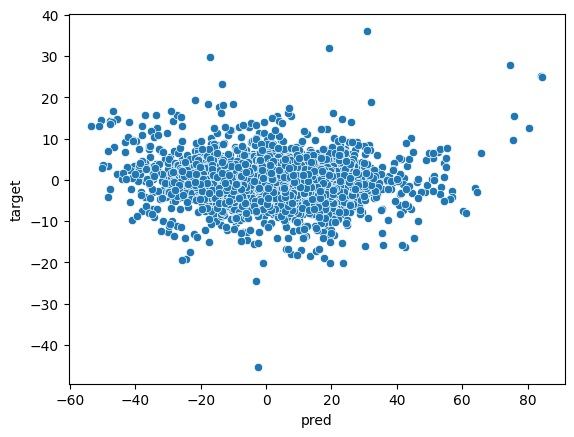

In [128]:
b= a.query('seconds_in_bucket > 480')
sns.scatterplot(x='pred', y='target', data=b)
print(b)

In [130]:
abs(b.target).mean()

3.7736338018354165

<Axes: xlabel='pred', ylabel='target'>

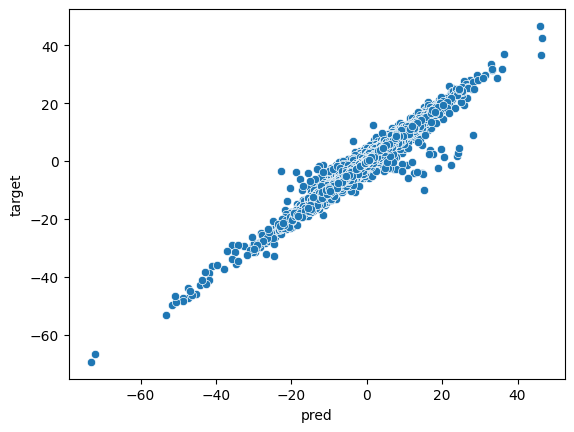

In [131]:
c= a.query('seconds_in_bucket <= 480')
sns.scatterplot(x='pred', y='target', data=c)

<Axes: xlabel='pred', ylabel='target'>

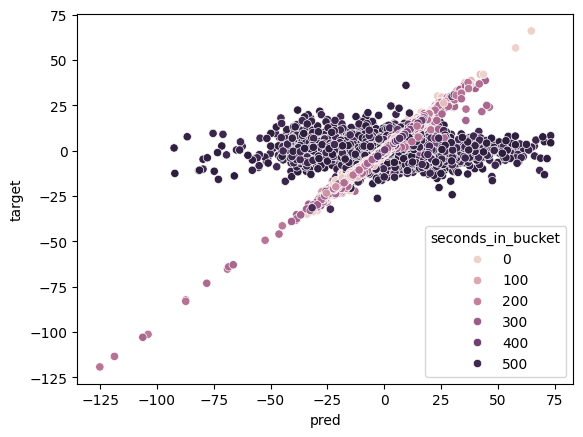

In [117]:
# 코드4: 3차원 - 그룹별 색으로 분류
sns.scatterplot(x='pred', y='target', hue='seconds_in_bucket', 
            data=a)

<class 'mpl_toolkits.mplot3d.axes3d.Axes3D'>


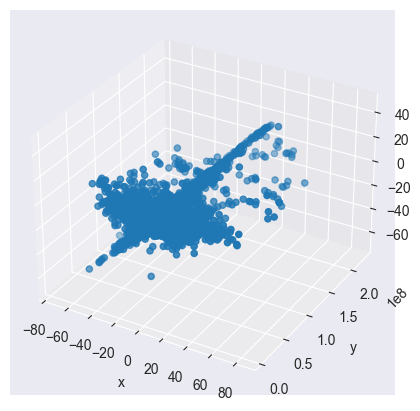

In [225]:
import seaborn as seaborn
import matplotlib.pyplot as plot
import numpy as np

seaborn.set_style("darkgrid")

mean = 3
number = 26449

x1 = pred
y1 = stock_0['matched_size'][:-6]
z1 = target

plot.figure(figsize=(6, 5))
axes = plot.axes(projection="3d")
print(type(axes))
axes.scatter3D(x1, y1, z1)

axes.set_xlabel("x")
axes.set_ylabel("y")
axes.set_zlabel("z")
plot.show()

<Axes: xlabel='None', ylabel='matched_size'>

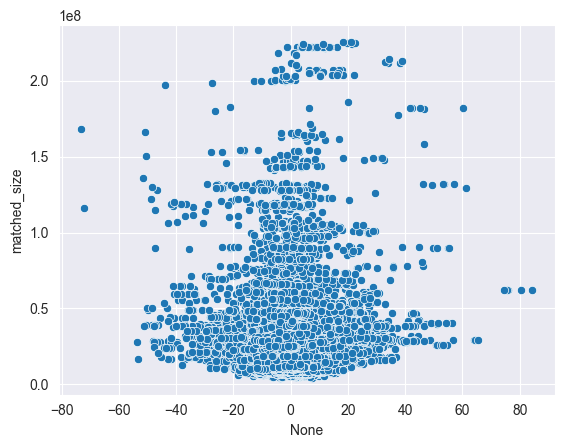

In [226]:
x1 = pred
y1 = stock_0['matched_size'][:-6]
sns.scatterplot(x=x1, y=y1)

           pred   target
pred    1.00000  0.64287
target  0.64287  1.00000


<Axes: xlabel='None', ylabel='target'>

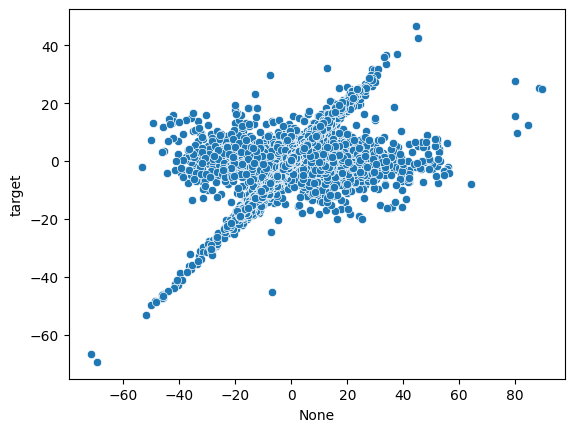

In [75]:
wap_60 = dataset_0_copy['wap_60']
wap = dataset_0_copy['wap']
wap_ratio = wap_60/wap
index = dataset_0_copy['index']
index_60 = dataset_0_copy['index_60']
index_ratio_pred = index_60 / index
index_ratio = dataset_0_copy['index_ratio']
target = dataset_0_copy['target']
#print(target)

pred = (wap_ratio - index_ratio_pred)*10000

df = pd.DataFrame(data = pred, columns=['pred'])
df = pd.concat([df,target], axis=1)
print(df.corr())
df = pd.concat([df,wap_ratio], axis=1)
sns.scatterplot(x=pred, y=target)

In [161]:
index_ratio

0          1.000820
191        1.000490
382        0.999884
573        0.999796
764        0.999627
             ...   
5235780    0.999943
5235980    1.000090
5236180    0.999924
5236380    0.999983
5236580    0.999888
Name: index_ratio, Length: 26449, dtype: float64

<Axes: >

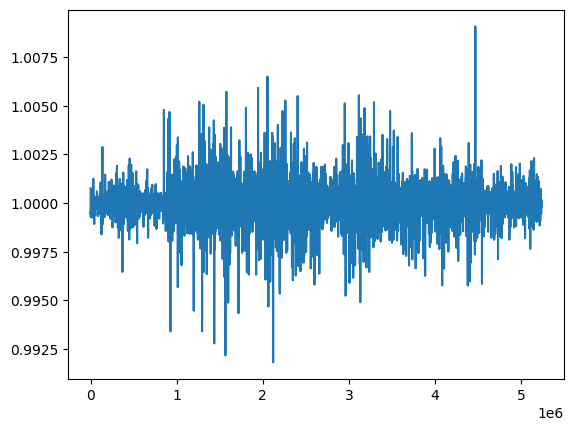

In [188]:
index_ratio_pred.plot()

<Axes: >

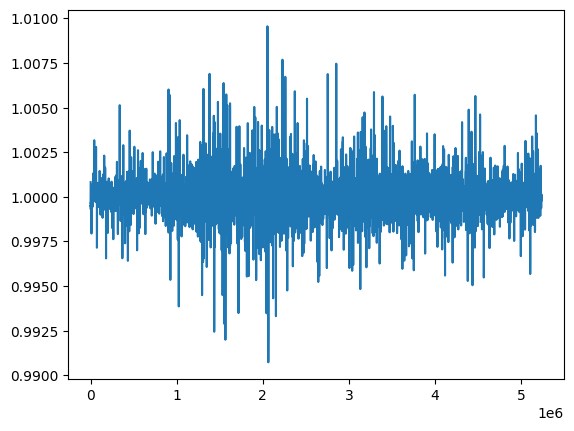

In [171]:
index_ratio.plot()

<Axes: xlabel='None', ylabel='index_ratio'>

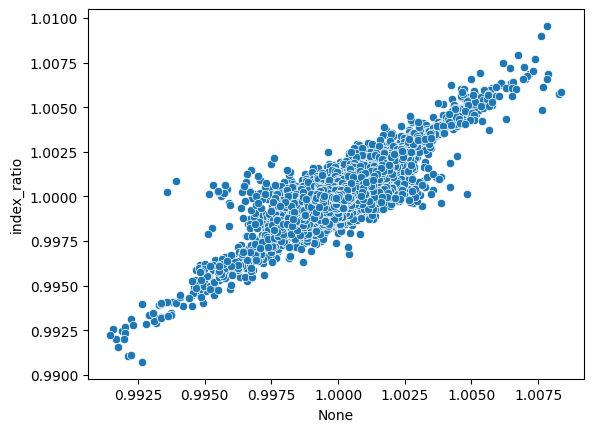

In [173]:
sns.scatterplot(x=wap_ratio, y=index_ratio)

In [213]:
pd.DataFrame([pred,target]).transpose()

,Unnamed 0,target
0,-2.333798,-3.029704
191,0.478292,0.389814
382,4.011997,4.220009
573,4.390911,5.450249
764,2.080745,3.169775
...,...,...
5235780,4.224136,4.440546
5235980,-0.563874,-0.609756
5236180,-0.460666,-0.640154
5236380,0.197030,0.139475


In [214]:
abs(pred-target).mean()

2.3750079968944524

In [77]:
list(train_data.columns)
features = stock_0.columns.drop(['stock_id', 'date_id','seconds_in_bucket', 'target', 'time_id', 'row_id'])
features

Index(['imbalance_size', 'imbalance_buy_sell_flag', 'reference_price',
       'matched_size', 'far_price', 'near_price', 'bid_price', 'bid_size',
       'ask_price', 'ask_size', 'wap'],
      dtype='object')

In [87]:
corr_dic = {}
stock_0_copy = stock_0.replace([np.inf, -np.inf], np.nan)
stock_0_copy = stock_0_copy.dropna()
for feature1 in features:
    for feature2 in features:
        if feature1 == feature2:
            #print(feature1, feature2)
            continue
        #print(stock_0[feature1])
        try:
            var = (stock_0_copy[feature1])*(stock_0_copy[feature2])
            corr = target.corr(var, method='pearson')
            #print(corr)
            corr_dic[(feature1, feature2)]=corr
        except:
            pass

corr_dic

{('imbalance_size', 'imbalance_buy_sell_flag'): 0.0029545602790693342,
 ('imbalance_size', 'reference_price'): 0.0287739221455684,
 ('imbalance_size', 'matched_size'): 0.032870213337812246,
 ('imbalance_size', 'far_price'): 0.02753614206529089,
 ('imbalance_size', 'near_price'): 0.028120539770896704,
 ('imbalance_size', 'bid_price'): 0.02877248633116044,
 ('imbalance_size', 'bid_size'): -0.0019264868028840984,
 ('imbalance_size', 'ask_price'): 0.0287833376106727,
 ('imbalance_size', 'ask_size'): 0.029876703117139053,
 ('imbalance_size', 'wap'): 0.02876910693909987,
 ('imbalance_buy_sell_flag', 'imbalance_size'): 0.0029545602790693342,
 ('imbalance_buy_sell_flag', 'reference_price'): -0.008851315017629344,
 ('imbalance_buy_sell_flag', 'matched_size'): 0.014714024406077875,
 ('imbalance_buy_sell_flag', 'far_price'): -0.008718535276935837,
 ('imbalance_buy_sell_flag', 'near_price'): -0.00875387851563869,
 ('imbalance_buy_sell_flag', 'bid_price'): -0.008850014552231155,
 ('imbalance_buy_se

In [88]:
stock_0_copy

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
5730,0,0,300,0.00,0,1.000241,26670118.88,1.000241,1.000241,1.000026,19319.31,1.000241,16149.55,1.000143,-10.039806,30,0_300_0
5921,0,0,310,0.00,0,0.999919,26670118.88,0.999919,0.999919,0.999812,22767.64,0.999919,18664.00,0.999871,-6.039739,31,0_310_0
6112,0,0,320,0.00,0,0.999919,26670118.88,0.999919,0.999919,0.999705,49262.40,0.999919,37607.96,0.999826,-5.440116,32,0_320_0
6303,0,0,330,0.00,0,0.999812,26670118.88,0.999812,0.999812,0.999705,27990.00,0.999812,14276.43,0.999776,-7.439852,33,0_330_0
6494,0,0,340,0.00,0,0.999491,26670118.88,0.999491,0.999491,0.999169,18743.25,0.999383,40012.83,0.999237,-2.700090,34,0_340_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5236980,0,480,500,0.00,0,0.999017,42161928.97,0.999017,0.999017,0.999017,53827.20,0.999193,146071.08,0.999065,3.999472,26450,480_500_0
5237180,0,480,510,0.00,0,0.998842,42161928.97,0.998842,0.998842,0.998842,157865.40,0.999017,120926.08,0.998941,3.190041,26451,480_510_0
5237380,0,480,520,475513.69,-1,0.999193,41686415.27,0.999017,0.999017,0.999193,57596.67,0.999368,46780.58,0.999289,-0.169873,26452,480_520_0
5237580,0,480,530,475513.69,-1,0.999193,41686415.27,0.999017,0.999017,0.999193,156610.53,0.999368,122677.94,0.999291,3.110170,26453,480_530_0


In [83]:
a = list(corr_dic.values())
a.sort()
a

[-0.06918813398186874,
 -0.06918813398186874,
 -0.06911897864936631,
 -0.06911897864936631,
 -0.06870683518887541,
 -0.06870683518887541,
 -0.0682504299027595,
 -0.0682504299027595,
 -0.06784627456689218,
 -0.06784627456689218,
 -0.0677720552793707,
 -0.0677720552793707,
 -0.05050787067402325,
 -0.05050787067402325,
 -0.05020992086472069,
 -0.05020992086472069,
 -0.05014449821663525,
 -0.05014449821663525,
 -0.050105613452331714,
 -0.050105613452331714,
 -0.0484248508270393,
 -0.0484248508270393,
 -0.048220294726345314,
 -0.048220294726345314,
 -0.04816971058775584,
 -0.04816971058775584,
 -0.048149842255170876,
 -0.048149842255170876,
 -0.04326598131683792,
 -0.04326598131683792,
 -0.02025650344226144,
 -0.02025650344226144,
 -0.020155697228317785,
 -0.020155697228317785,
 -0.020006552621646738,
 -0.020006552621646738,
 -0.020005993971683803,
 -0.020005993971683803,
 -0.020004368122931385,
 -0.020004368122931385,
 -0.020004094296152367,
 -0.020004094296152367,
 -0.010981957550559807,


<Axes: xlabel='None', ylabel='target'>

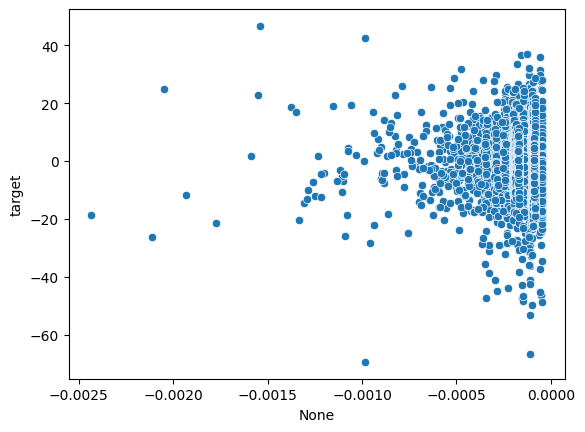

In [35]:
sns.scatterplot(x=(stock_0['bid_price']-stock_0['ask_price'])/(stock_0['bid_price']+stock_0['ask_price']), y=target)

<Axes: >

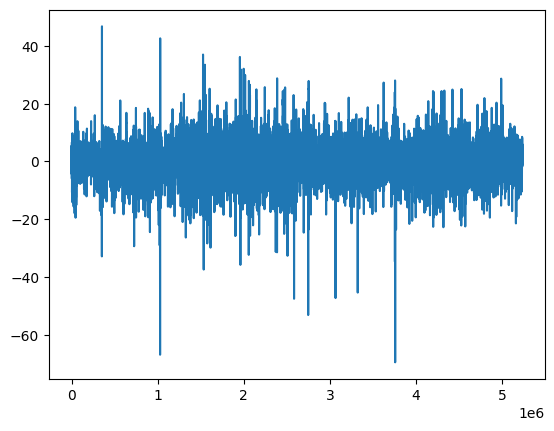

In [425]:
(dataset[0]['target']).plot()

<Axes: >

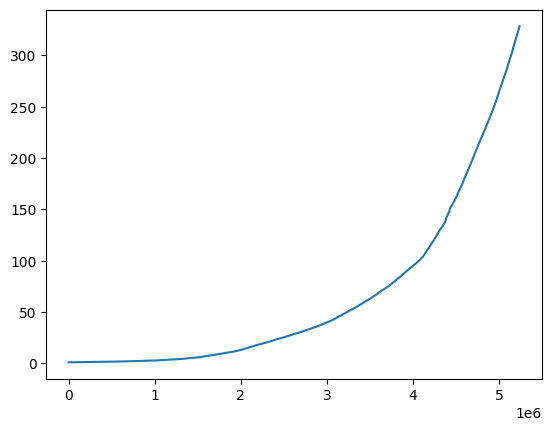

In [335]:
(stock_0['ask_price']/stock_0['bid_price']).cumprod().plot()

<Axes: >

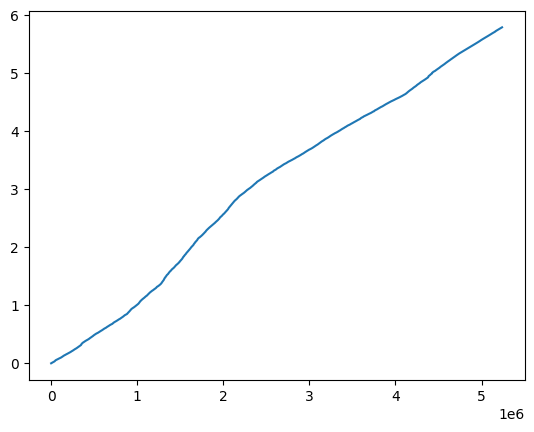

In [336]:
(stock_0['ask_price']-stock_0['bid_price']).cumsum().plot()

<Axes: >

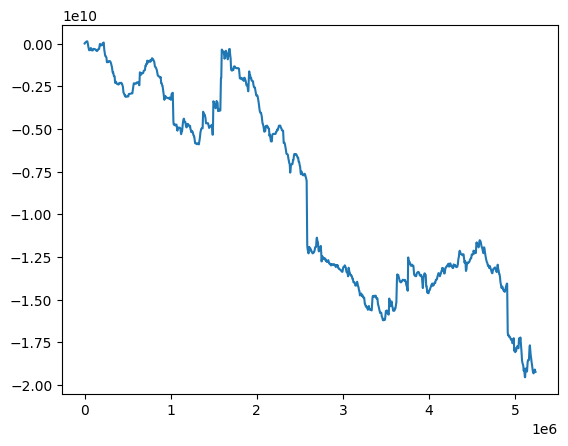

In [316]:
stock_0['imbalance_buy_sell_flag']
(stock_0['imbalance_buy_sell_flag']*stock_0['imbalance_size']).cumsum().plot()

<Axes: >

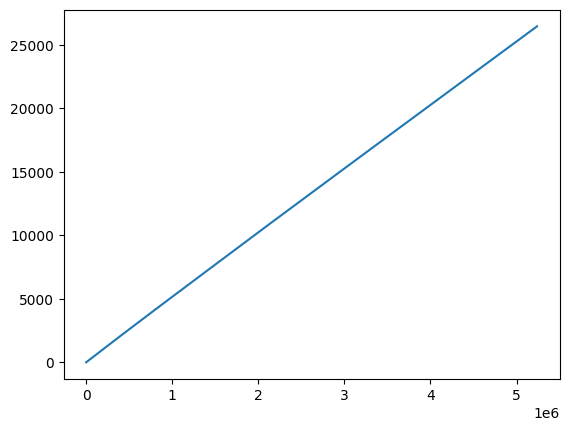

In [311]:
(stock_0['reference_price']).cumsum().plot()

<Axes: >

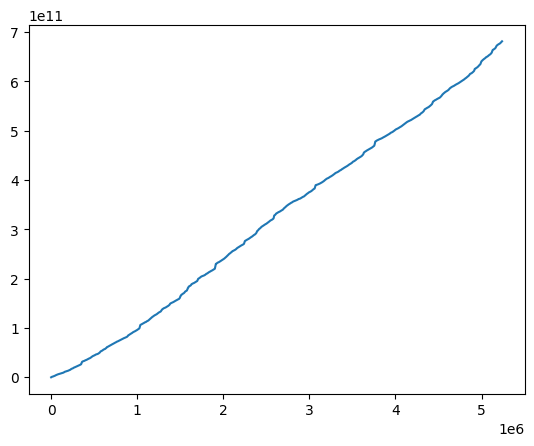

In [18]:
(stock_0['matched_size']).cumsum().plot()

<Axes: >

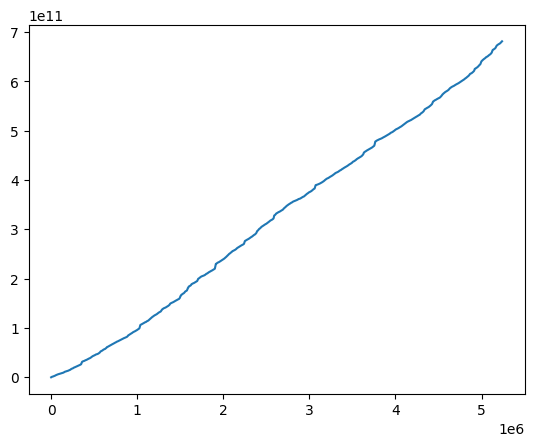

In [323]:
(stock_0['matched_size']*stock_0['reference_price']).cumsum().plot()

<Axes: >

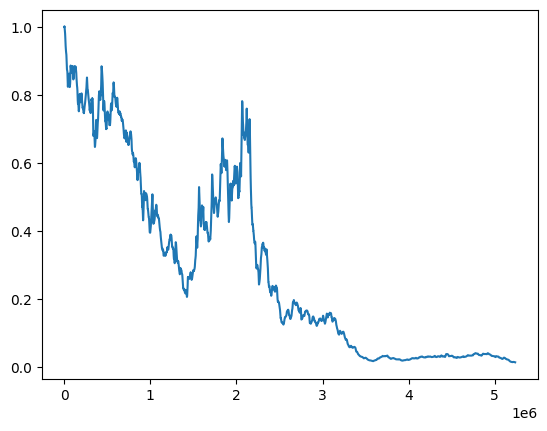

In [287]:
dataset[0]['wap'].cumprod().plot()

<Axes: xlabel='imbalance_buy_sell_flag', ylabel='target'>

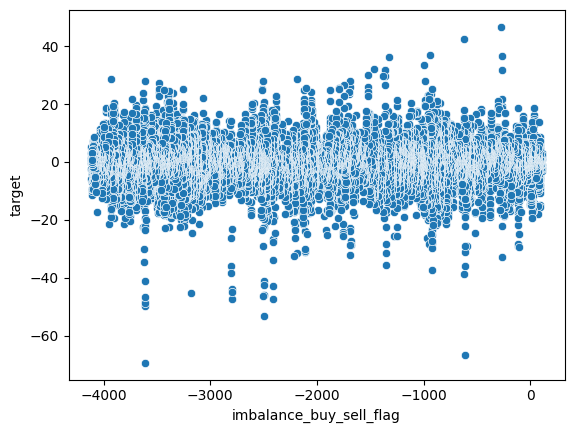

In [279]:
sns.scatterplot(x=stock_0['imbalance_buy_sell_flag'].cumsum(), y=stock_0['target'])

<Axes: >

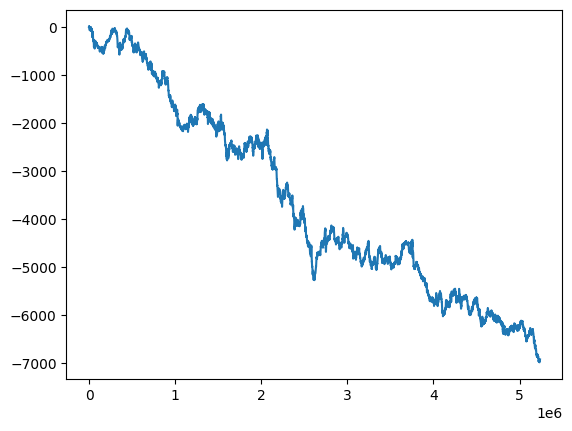

In [301]:
wap_60 = dataset[0]['wap_60']
wap = dataset[0]['wap']
wap_ratio = wap_60/wap
index_60 = dataset[0]['index_60']
index = dataset[0]['index']
target = dataset[0]['target']
index_ratio = wap_ratio - (target/10000)


index_60_estimate = index_ratio * index
index_error = index_60_estimate - index_60


target.cumsum().plot()

<Axes: >

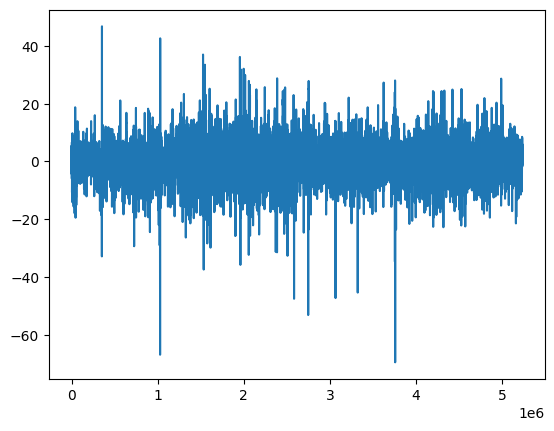

In [300]:
target.plot()

<Axes: >

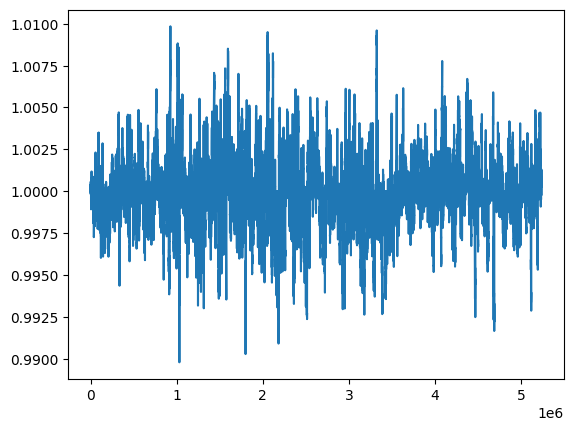

In [232]:
dataset[0]['wap_60'].plot()

<Axes: xlabel='None', ylabel='wap'>

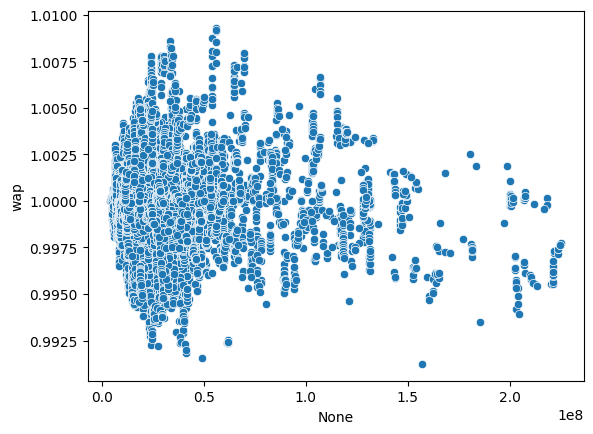

In [267]:
sns.scatterplot(x=stock_0['reference_price']*stock_0['matched_size'], y=dataset[0]['target'])

In [453]:
wap_ml_dic = {}
#loo_res = []
counter = 0
for id in dataset.keys():
    raw_stock_data = train_data[train_data['stock_id']==id]
    stock_data = dataset[id]
    x_data = stock_data[['wap']]
    x_data['bid_price'] = raw_stock_data['bid_price']
    x_data['ask_price'] = raw_stock_data['ask_price']
    x_data['reference_price'] = raw_stock_data['reference_price']
    if counter == 0:
        print(x_data)
        counter += 1
    y_data = stock_data['wap_60']
    train_X, test_X, train_y, test_y = train_test_split(x_data, y_data, test_size=0.2, shuffle=True, random_state=42)
    train_X = sm.add_constant(train_X, has_constant='add')  # 상수항 추가
    test_X = sm.add_constant(test_X, has_constant='add')  # 상수항 추가
    lin_model = sm.OLS(train_y, train_X)
    lin_model = lin_model.fit()
    pred = lin_model.predict(test_X)
    mse = mean_squared_error(pred, test_y)
    wap_ml_dic[id] = lin_model
    

C:\Users\John\AppData\Local\Temp\ipykernel_21536\1089256267.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_data['bid_price'] = raw_stock_data['bid_price']
C:\Users\John\AppData\Local\Temp\ipykernel_21536\1089256267.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_data['ask_price'] = raw_stock_data['ask_price']
C:\Users\John\AppData\Local\Temp\ipykernel_21536\1089256267.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

              wap  bid_price  ask_price  reference_price
0        1.000000   0.999812   1.000026         0.999812
191      0.999892   0.999812   1.000026         1.000026
382      0.999842   0.999812   0.999919         0.999919
573      1.000085   1.000026   1.000133         1.000133
764      1.000317   1.000241   1.000455         1.000455
...           ...        ...        ...              ...
5235780  0.998678   0.998667   0.998842         0.998667
5235980  0.998912   0.998842   0.999017         0.998842
5236180  0.999429   0.999368   0.999543         0.999368
5236380  0.999294   0.999193   0.999368         0.999193
5236580  0.999324   0.999193   0.999368         0.999193

[26449 rows x 4 columns]


C:\Users\John\AppData\Local\Temp\ipykernel_21536\1089256267.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_data['bid_price'] = raw_stock_data['bid_price']
C:\Users\John\AppData\Local\Temp\ipykernel_21536\1089256267.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_data['ask_price'] = raw_stock_data['ask_price']
C:\Users\John\AppData\Local\Temp\ipykernel_21536\1089256267.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [454]:
idx_ml_dic = {}
counter = 0
for id in dataset.keys():
    raw_stock_data = train_data[train_data['stock_id']==id]
    stock_data = dataset[id]
    x_data = stock_data[['wap','index']]
    x_data['bid_price'] = raw_stock_data['bid_price']
    x_data['ask_price'] = raw_stock_data['ask_price']
    x_data['reference_price'] = raw_stock_data['reference_price']
    if counter == 0:
        print(x_data)
        counter += 1
    y_data = stock_data['index_60']
    train_X, test_X, train_y, test_y = train_test_split(x_data, y_data, test_size=0.2, shuffle=True, random_state=42)
    train_X = sm.add_constant(train_X, has_constant='add')  # 상수항 추가
    test_X = sm.add_constant(test_X, has_constant='add')  # 상수항 추가
    lin_model = sm.OLS(train_y, train_X)
    lin_model = lin_model.fit()
    pred = lin_model.predict(test_X)
    mse = mean_squared_error(pred, test_y)
    idx_ml_dic[id] = lin_model
    

C:\Users\John\AppData\Local\Temp\ipykernel_21536\41826858.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_data['bid_price'] = raw_stock_data['bid_price']
C:\Users\John\AppData\Local\Temp\ipykernel_21536\41826858.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_data['ask_price'] = raw_stock_data['ask_price']
C:\Users\John\AppData\Local\Temp\ipykernel_21536\41826858.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

              wap     index  bid_price  ask_price  reference_price
0        1.000000  1.000000   0.999812   1.000026         0.999812
191      0.999892  1.000403   0.999812   1.000026         1.000026
382      0.999842  1.000527   0.999812   0.999919         0.999919
573      1.000085  1.000534   1.000026   1.000133         1.000133
764      1.000317  1.000584   1.000241   1.000455         1.000455
...           ...       ...        ...        ...              ...
5235780  0.998678  0.999231   0.998667   0.998842         0.998667
5235980  0.998912  0.999127   0.998842   0.999017         0.998842
5236180  0.999429  0.999178   0.999368   0.999543         0.999368
5236380  0.999294  0.999134   0.999193   0.999368         0.999193
5236580  0.999324  0.999170   0.999193   0.999368         0.999193

[26449 rows x 5 columns]


C:\Users\John\AppData\Local\Temp\ipykernel_21536\41826858.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_data['bid_price'] = raw_stock_data['bid_price']
C:\Users\John\AppData\Local\Temp\ipykernel_21536\41826858.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_data['ask_price'] = raw_stock_data['ask_price']
C:\Users\John\AppData\Local\Temp\ipykernel_21536\41826858.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [402]:
wap_ml_dic[18].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 wap_60   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                 1.982e+04
Date:                Tue, 14 Nov 2023   Prob (F-statistic):               0.00
Time:                        01:40:32   Log-Likelihood:             1.0214e+05
No. Observations:               21159   AIC:                        -2.043e+05
Df Residuals:                   21156   BIC:                        -2.043e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1640      0.009     17.814      0.000       0.146       0.182
wap            0.7990      0.005    167.305      0.000       0.790       0.808
index          0.0371      0.011      3.439      0.001       0.016       0.058
==============================================================================
Omnibus:                     5185.443   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           277950.872
Skew:                           0.292   Prob(JB):                         0.00
Kurtosis:                      20.746   Cond. No.                     1.81e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.81e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [372]:
pred

1918850    1.002588
2967164    1.000431
1734064    0.998349
5168579    1.000689
3014924    0.999662
             ...   
2705877    0.998089
3175119    0.998381
5067779    1.000420
1434285    1.005191
1922593    1.003588
Length: 4322, dtype: float64

In [69]:
idx_ml_dic[199][0].predict([1, 0.999680,0.998958])

array([0.99914091])

In [70]:
dataset[199].loc[4173579]

stock_id             199.000000
date_id              384.000000
seconds_in_bucket    120.000000
wap                    0.999680
target               -10.449886
wap_60                 0.997117
index                  0.998958
index_60               0.999182
Name: 4173579, dtype: float64

[0.6617764582884376,
 0.6522807103326433,
 0.6546308636271185,
 0.6474235459622207,
 0.6590163675750862,
 0.6666569647069192,
 0.6386856868678334,
 0.6657817939151394,
 0.6262251802820327,
 0.6663353679114671,
 0.6529431700531763,
 0.6663538300053617,
 0.6559356131463836,
 0.6822823597482455,
 0.6536051456210137,
 0.6644568136690494,
 0.6568982392596208,
 0.6530276870191717,
 0.652377324852112,
 0.6363577832099248,
 0.6577438847384012,
 0.668591839559753,
 0.687188865248737,
 0.6783407678303983,
 0.6703387478414525,
 0.68524679492837,
 0.67987883554645,
 0.658914541412337,
 0.6814799643505377,
 0.6351315000717436,
 0.6756609940961908,
 0.6792965234500346,
 0.6576720525464326,
 0.6740308808290312,
 0.6400011019527307,
 0.650013863329811,
 0.6623349796166007,
 0.6585335609034924,
 0.6582686150273592,
 0.6467113706274032,
 0.6625038863461363,
 0.6810940968584058,
 0.6384140090819155,
 0.6470170691127604,
 0.6655406915085458,
 0.6592999898596379,
 0.6412336100366756,
 0.6628801692941048,
 

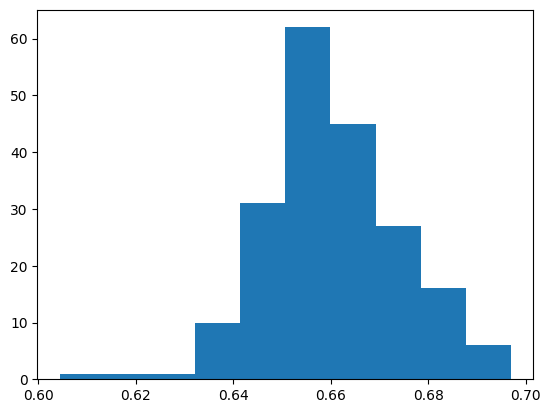

In [414]:
rsquared_list = []
for i in range(200):
    rsquared_list.append(wap_ml_dic[i].rsquared)
    
plt.hist(rsquared_list)
rsquared_list

(array([ 1.,  1.,  1., 10., 31., 62., 45., 27., 16.,  6.]),
 array([0.60446385, 0.61371205, 0.62296025, 0.63220846, 0.64145666,
        0.65070486, 0.65995307, 0.66920127, 0.67844947, 0.68769767,
        0.69694588]),
 <BarContainer object of 10 artists>)

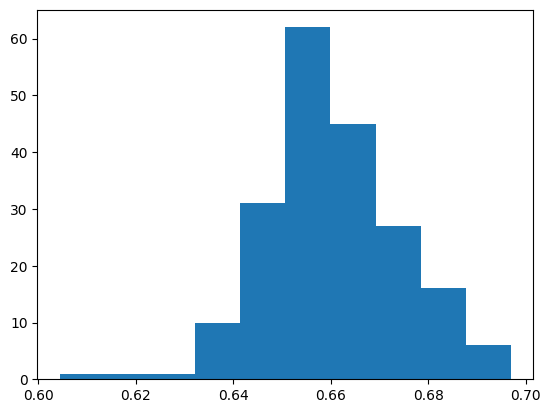

In [415]:
rsquared_list = []
for i in range(200):
    rsquared_list.append(wap_ml_dic[i].rsquared)
    
plt.hist(rsquared_list)

[0.9999991833816242,
 0.9999991833816242,
 0.9999991833816242,
 0.9999991833816242,
 0.9999991833816242,
 0.9999991833816242,
 0.9999991833816242,
 0.9999991833816242,
 0.9999991833816242,
 0.9999991833816242,
 0.9999991833816242,
 0.9999991833816242,
 0.9999991833816242,
 0.9999991833816242,
 0.9999991833816242,
 0.9999991833816242,
 0.9999991833816242,
 0.9999991833816242,
 0.9999991833816242,
 0.9999991833816242,
 0.9999991833816242,
 0.9999991833816242,
 0.9999991833816242,
 0.9999991833816242,
 0.9999991833816242,
 0.9999991833816242,
 0.9999991833816242,
 0.9999991833816242,
 0.9999991833816242,
 0.9999991833816242,
 0.9999991833816242,
 0.9999991833816242,
 0.9999991833816242,
 0.9999991833816242,
 0.9999991833816242,
 0.9999991833816242,
 0.9999991833816242,
 0.9999991833816242,
 0.9999991833816242,
 0.9999991833816242,
 0.9999991833816242,
 0.9999991833816242,
 0.9999991833816242,
 0.9999991833816242,
 0.9999991833816242,
 0.9999991833816242,
 0.9999991833816242,
 0.9999991833

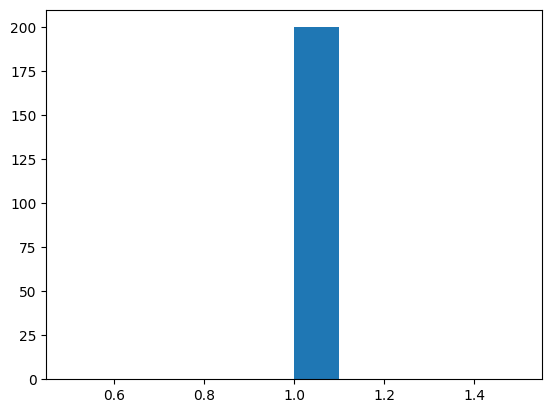

In [394]:
rsquared_list = []
for i in range(200):
    rsquared_list.append(idx_ml_dic[i].rsquared)
    
plt.hist(rsquared_list)
rsquared_list

[0.6797956543233363,
 0.6797882523389316,
 0.6799122305828861,
 0.6798361925427898,
 0.6798175808297982,
 0.679794544016095,
 0.6798263831481723,
 0.6798585375971251,
 0.6797865723651355,
 0.679817863955847,
 0.6798406949286103,
 0.679792395221769,
 0.6799082767323616,
 0.6783325779066456,
 0.6798382428620379,
 0.6797884691351632,
 0.6798210776192728,
 0.6798298723966891,
 0.6797988313412489,
 0.6783772288534936,
 0.6797977275273246,
 0.6798084726922389,
 0.6798410523810736,
 0.6797942727933126,
 0.6797862709750773,
 0.6797864069345818,
 0.6798397953947708,
 0.6798300990090003,
 0.6798115045129374,
 0.679845246116256,
 0.6798263014481583,
 0.6798035923893695,
 0.6797956764448916,
 0.679786271335874,
 0.6798203119025243,
 0.6797899145999138,
 0.6797864522190289,
 0.6797993669782088,
 0.6798149206397903,
 0.6797951319794818,
 0.6797999796046829,
 0.6797865221766016,
 0.6797908895942997,
 0.6798033346842751,
 0.6797878435874682,
 0.6798273701367219,
 0.6798261347890093,
 0.679792251807660

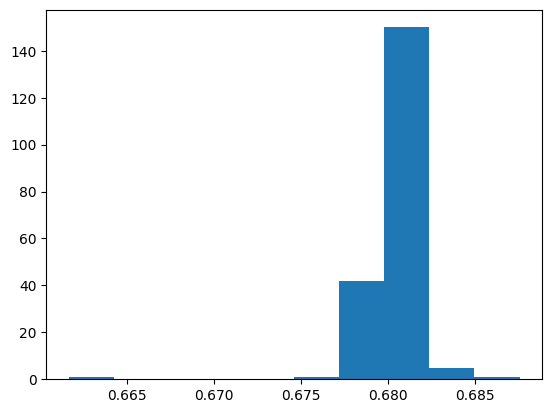

In [74]:
rsquared_list = []
for i in range(200):
    rsquared_list.append(idx_ml_dic[i][0].rsquared)
    
plt.hist(rsquared_list)
rsquared_list

In [89]:
wap_ml_dic[180][1]

1.394833590619385e-06

In [88]:
wap_ml_dic[180][0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 wap_60   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          7.048e+09
Date:                Mon, 13 Nov 2023   Prob (F-statistic):                        0.00
Time:                        18:55:46   Log-Likelihood:                      1.1185e+05
No. Observations:               21159   AIC:                                 -2.237e+05
Df Residuals:                   21157   BIC:                                 -2.237e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
wap           -0.0241      0.003     -8.757      0.000      -0.029      -0.019
index          1.0240      0.003    372.239      0.000       1.019       1.029
==============================================================================
Omnibus:                     1309.465   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5965.223
Skew:                          -0.060   Prob(JB):                         0.00
Kurtosis:                       5.598   Cond. No.                         653.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# MAE Calculate

In [516]:
test_data = pd.read_csv('./example_test_files/test.csv')
revealed_targets = pd.read_csv('./example_test_files/revealed_targets.csv')
revealed_targets = revealed_targets.dropna()
revealed_targets_copy = revealed_targets['revealed_target'].reset_index(drop=True)
test_data

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,time_id,row_id
0,0,478,0,3753451.43,-1,0.999875,11548975.43,NaN,NaN,0.999875,22940.00,1.000050,9177.60,1.000000,26290,478_0_0
1,1,478,0,985977.11,-1,1.000245,3850033.97,NaN,NaN,0.999940,1967.90,1.000601,19692.00,1.000000,26290,478_0_1
2,2,478,0,599128.74,1,1.000584,4359198.25,NaN,NaN,0.999918,4488.22,1.000636,34955.12,1.000000,26290,478_0_2
3,3,478,0,2872317.54,-1,0.999802,27129551.64,NaN,NaN,0.999705,16082.04,1.000189,10314.00,1.000000,26290,478_0_3
4,4,478,0,740059.14,-1,0.999886,8880890.78,NaN,NaN,0.999720,19012.35,1.000107,7245.60,1.000000,26290,478_0_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32995,195,480,540,2440722.89,-1,1.000317,28280361.74,0.999734,0.999734,1.000317,32257.04,1.000434,319862.40,1.000328,26454,480_540_195
32996,196,480,540,349510.47,-1,1.000643,9187699.11,1.000129,1.000386,1.000643,205108.40,1.000900,93393.07,1.000819,26454,480_540_196
32997,197,480,540,0.00,0,0.995789,12725436.10,0.995789,0.995789,0.995789,16790.66,0.995883,180038.32,0.995797,26454,480_540_197
32998,198,480,540,1000898.84,1,0.999210,94773271.05,0.999210,0.999210,0.998970,125631.72,0.999210,669893.00,0.999008,26454,480_540_198


In [517]:
revealed_targets_copy

0        -2.310276
1       -12.850165
2        -0.439882
3         7.259846
4         4.780292
           ...    
32995     1.599789
32996    -8.440018
32997     5.149841
32998    -0.249743
32999    -7.609725
Name: revealed_target, Length: 33000, dtype: float64

In [458]:
def generate_target(test):
    wap = test.wap
    idx = wap.mean()
    bid_price = test.bid_price
    ask_price = test.ask_price
    reference_price = test.reference_price
    
    wap_60_list = []
    idx_60_list = []
    
    for id in range(200):
        wap_60 = wap_ml_dic[id].predict([1, wap[id], bid_price[id], ask_price[id], reference_price[id]])
        idx_60 = idx_ml_dic[id].predict([1, wap[id], idx, bid_price[id], ask_price[id], reference_price[id]])
        wap_60_list.append(wap_60[0])
        idx_60_list.append(idx_60[0])
    
    wap_60_ser = pd.Series(wap_60_list, copy=False)
    idx_60_ser = pd.Series(idx_60_list, copy=False)
    
    target = (wap_60_ser/wap - idx_60_ser/idx)*10000
    
    return target

In [459]:
import public_timeseries_testing_util as optiver2023
env = optiver2023.make_env()
iter_test = env.iter_test()

counter = 0
for (test, revealed_targets, sample_prediction) in iter_test:
    target = generate_target(test)
    
    sample_prediction['target'] = target
    env.predict(sample_prediction)
    counter += 1

In [501]:
submission = pd.read_csv('submission.csv')
pred = submission['target']
abs(pred- revealed_targets_copy).mean()

6.074054673898799

In [503]:
submission

,row_id,target
0,478_0_0,-0.706779
1,478_0_1,1.870793
2,478_0_2,3.026909
3,478_0_3,-0.496952
4,478_0_4,-0.933116
...,...,...
32995,480_540_195,-1.976568
32996,480_540_196,-3.209424
32997,480_540_197,6.217864
32998,480_540_198,0.265569


In [520]:
test_data.query('stock_id == 0')

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,time_id,row_id
0,0,478,0,3753451.43,-1,0.999875,11548975.43,NaN,NaN,0.999875,22940.00,1.000050,9177.60,1.000000,26290,478_0_0
200,0,478,10,3771174.79,-1,1.000050,11550982.93,NaN,NaN,1.000050,17208.00,1.000224,21456.38,1.000127,26291,478_10_0
400,0,478,20,3771174.79,-1,1.000050,11550982.93,NaN,NaN,1.000050,917.76,1.000224,41535.88,1.000054,26292,478_20_0
600,0,478,30,4080903.36,-1,1.000224,11539511.50,NaN,NaN,1.000224,30176.62,1.000399,15033.56,1.000341,26293,478_30_0
800,0,478,40,4045858.14,-1,1.000224,11574556.71,NaN,NaN,1.000224,20136.87,1.000399,25706.24,1.000301,26294,478_40_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32000,0,480,500,0.00,0,0.999017,42161928.97,0.999017,0.999017,0.999017,53827.20,0.999193,146071.08,0.999065,26450,480_500_0
32200,0,480,510,0.00,0,0.998842,42161928.97,0.998842,0.998842,0.998842,157865.40,0.999017,120926.08,0.998941,26451,480_510_0
32400,0,480,520,475513.69,-1,0.999193,41686415.27,0.999017,0.999017,0.999193,57596.67,0.999368,46780.58,0.999289,26452,480_520_0
32600,0,480,530,475513.69,-1,0.999193,41686415.27,0.999017,0.999017,0.999193,156610.53,0.999368,122677.94,0.999291,26453,480_530_0


In [524]:
test_X_stock_0 = test_data.query('stock_id == 0').reset_index(drop=True)
test_y_stock_0 = revealed_targets.query('stock_id == 0').reset_index(drop=True)
test_y_stock_0

,stock_id,date_id,seconds_in_bucket,time_id,revealed_target,revealed_date_id,revealed_time_id
0,0.0,478,0,26290,-2.310276,477.0,26235.0
1,0.0,478,10,26290,-7.200241,477.0,26236.0
2,0.0,478,20,26290,-7.500052,477.0,26237.0
3,0.0,478,30,26290,-12.480021,477.0,26238.0
4,0.0,478,40,26290,-9.570122,477.0,26239.0
...,...,...,...,...,...,...,...
160,0.0,480,500,26400,1.579523,479.0,26395.0
161,0.0,480,510,26400,-0.180006,479.0,26396.0
162,0.0,480,520,26400,2.199411,479.0,26397.0
163,0.0,480,530,26400,1.929998,479.0,26398.0


In [525]:
test_X_stock_0['revealed_target'] = test_y_stock_0['revealed_target']
test_X_stock_0

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,time_id,row_id,revealed_target
0,0,478,0,3753451.43,-1,0.999875,11548975.43,NaN,NaN,0.999875,22940.00,1.000050,9177.60,1.000000,26290,478_0_0,-2.310276
1,0,478,10,3771174.79,-1,1.000050,11550982.93,NaN,NaN,1.000050,17208.00,1.000224,21456.38,1.000127,26291,478_10_0,-7.200241
2,0,478,20,3771174.79,-1,1.000050,11550982.93,NaN,NaN,1.000050,917.76,1.000224,41535.88,1.000054,26292,478_20_0,-7.500052
3,0,478,30,4080903.36,-1,1.000224,11539511.50,NaN,NaN,1.000224,30176.62,1.000399,15033.56,1.000341,26293,478_30_0,-12.480021
4,0,478,40,4045858.14,-1,1.000224,11574556.71,NaN,NaN,1.000224,20136.87,1.000399,25706.24,1.000301,26294,478_40_0,-9.570122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,0,480,500,0.00,0,0.999017,42161928.97,0.999017,0.999017,0.999017,53827.20,0.999193,146071.08,0.999065,26450,480_500_0,1.579523
161,0,480,510,0.00,0,0.998842,42161928.97,0.998842,0.998842,0.998842,157865.40,0.999017,120926.08,0.998941,26451,480_510_0,-0.180006
162,0,480,520,475513.69,-1,0.999193,41686415.27,0.999017,0.999017,0.999193,57596.67,0.999368,46780.58,0.999289,26452,480_520_0,2.199411
163,0,480,530,475513.69,-1,0.999193,41686415.27,0.999017,0.999017,0.999193,156610.53,0.999368,122677.94,0.999291,26453,480_530_0,1.929998


In [528]:
test_X_stock_0 = test_X_stock_0.drop(columns=['stock_id', 'date_id', 'seconds_in_bucket'])
test_X_stock_0['wap_60'] = test_X_stock_0['wap'].shift(-6)
test_X_stock_0.corr()

,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,time_id,row_id,revealed_target,wap_60
imbalance_size,1.000000,0.195371,0.359324,-0.523460,-0.791207,-0.844047,0.336165,-0.237199,0.339135,-0.387034,0.342246,-0.169927,-0.314799,-0.046028,0.241338
imbalance_buy_sell_flag,0.195371,1.000000,-0.157667,0.311591,0.559942,0.475082,-0.209561,0.180499,-0.210168,-0.124272,-0.202357,0.107928,-0.331082,0.135585,-0.212272
reference_price,0.359324,-0.157667,1.000000,-0.740986,0.062493,0.249044,0.989725,-0.337841,0.989751,-0.379981,0.990007,-0.773048,-0.313339,-0.057028,0.760337
matched_size,-0.523460,0.311591,-0.740986,1.000000,0.436744,0.269145,-0.758687,0.462779,-0.760995,0.476054,-0.761862,0.550479,0.395744,0.183938,-0.672187
far_price,-0.791207,0.559942,0.062493,0.436744,1.000000,0.957981,0.021165,0.369009,0.016586,-0.024414,0.032282,-0.180651,-0.220750,0.123306,0.013802
near_price,-0.844047,0.475082,0.249044,0.269145,0.957981,1.000000,0.206213,0.310756,0.201630,-0.103788,0.218314,-0.389154,-0.427171,0.117558,0.200725
bid_price,0.336165,-0.209561,0.989725,-0.758687,0.021165,0.206213,1.000000,-0.355201,0.999644,-0.369536,0.999107,-0.773019,-0.290639,-0.046436,0.771521
bid_size,-0.237199,0.180499,-0.337841,0.462779,0.369009,0.310756,-0.355201,1.000000,-0.358186,0.275851,-0.334813,0.210390,0.155352,0.162864,-0.078182
ask_price,0.339135,-0.210168,0.989751,-0.760995,0.016586,0.201630,0.999644,-0.358186,1.000000,-0.369926,0.998831,-0.774564,-0.295762,-0.049798,0.774006
ask_size,-0.387034,-0.124272,-0.379981,0.476054,-0.024414,-0.103788,-0.369536,0.275851,-0.369926,1.000000,-0.388185,0.379982,0.219078,0.248753,-0.326803


<Axes: xlabel='None', ylabel='revealed_target'>

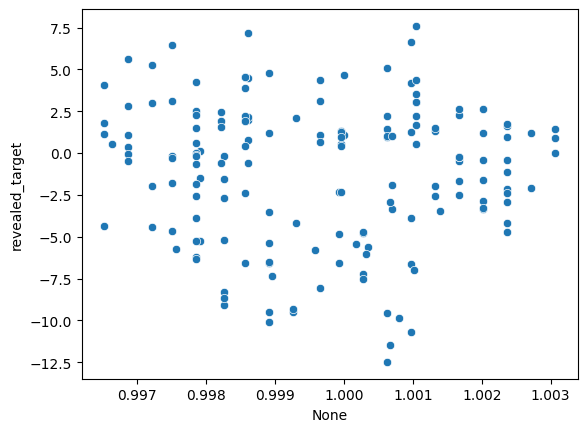

In [531]:
sns.scatterplot(x=test_X_stock_0['ask_price']*test_X_stock_0['bid_price'], y=test_y_stock_0['revealed_target'])

In [509]:
revealed_targets_copy

0        -2.310276
1       -12.850165
2        -0.439882
3         7.259846
4         4.780292
           ...    
32995     1.599789
32996    -8.440018
32997     5.149841
32998    -0.249743
32999    -7.609725
Name: revealed_target, Length: 33000, dtype: float64

<Axes: xlabel='target', ylabel='revealed_target'>

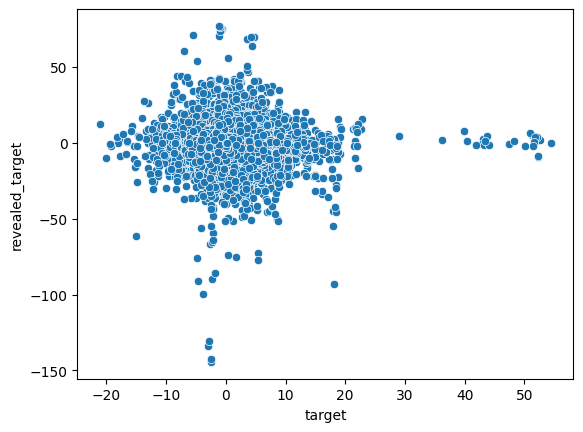

In [508]:
sns.scatterplot(x=submission['target'], y=revealed_targets_copy)

In [504]:
target

0     -0.415810
1      6.411241
2      3.242330
3      0.375944
4      1.028462
         ...   
195   -1.976568
196   -3.209424
197    6.217864
198    0.265569
199   -5.891594
Length: 200, dtype: float64

In [499]:
dict = {}
for i in range(-20,20):
    submission['target'] = i*(1/10)
    pred = submission['target']
    dict[i] = (abs(pred- revealed_targets_copy).mean())
    
a = min(dict.values())
for key in dict.keys():
    if dict[key] == a:
        print(key)
        
submission['target'] = -0.1
pred = submission['target']
print(mean_absolute_error(pred, revealed_targets_copy))
print(abs(pred- revealed_targets_copy).mean())

-1
5.390119343287394
5.390119343287394


In [379]:
import public_timeseries_testing_util as optiver2023
env = optiver2023.make_env()
iter_test = env.iter_test()

counter = 0
for (test, revealed_targets, sample_prediction) in iter_test:
    if counter == 0:
        #print(test)
        #print(revealed_targets.head(3))
        #print(sample_prediction.head(3))
        last_index = 1
        recent_index = test.wap.mean()
        index_ratio = last_index/recent_index
        print(last_index, recent_index, index_ratio)

        last_wap = 1
        recent_wap = test.wap
        wap_ratio = last_wap/recent_wap
        #print(wap_ratio)
        prediction = (wap_ratio - index_ratio)*10000
        #print(prediction.values)
        
    else:
        print(last_index, recent_index, index_ratio)
        last_index = recent_index
        recent_index = test.wap.mean()
        index_ratio = last_index/recent_index
        #print(last_index, recent_index, index_ratio)
        #print(index_ratio)
        
        last_wap = recent_wap
        recent_wap = test.wap
        wap_ratio = last_wap/recent_wap
        #print(wap_ratio)
        prediction = (wap_ratio - index_ratio)*10000
    
        
    
    sample_prediction['target'] = prediction.values
    #print(sample_prediction)
    #predictions = pd.concat[[predictions, sample_prediction]]
    #print(predictions)
    env.predict(sample_prediction)
    counter += 1

1 1.0 1.0
1 1.0 1.0
1.0 1.000133545 0.9998664728318857
1.000133545 1.00020861 0.9999249506560436
1.00020861 1.000342875 0.9998657810203326
1.000342875 1.0004206450000002 0.9999222626998066
1.0004206450000002 1.000732955 0.9996879187415191
1.000732955 1.00088392 0.9998491683231359
1.00088392 1.00116437 0.9997198761677866
1.00116437 1.0013198 0.9998447748661315
1.0013198 1.0013759749999998 0.9999439021891856
1.0013759749999998 1.0011595299999998 1.0002161943162045
1.0011595299999998 1.00111415 1.0000453294961416
1.00111415 1.001236135 0.9998781656037613
1.001236135 1.0013223949999999 0.9999138539191468
1.0013223949999999 1.00132347 0.9999989264208496
1.00132347 1.001179755 1.0001435456513001
1.001179755 1.00070334 1.0004760801537844
1.00070334 1.0005741499999998 1.0001291158681245
1.0005741499999998 1.000711105 0.9998631423201803
1.000711105 1.000861055 0.9998501790041174
1.000861055 1.00093591 0.999925214992037
1.00093591 1.0010422650000002 0.999893755734679
1.0010422650000002 1.0010671

In [380]:
submission = pd.read_csv('submission.csv')
pred = submission['target']
abs(pred- revealed_targets_copy).mean()

6.05181303538446

In [142]:
submission_1 = pd.read_csv('./example_test_files/submission (5).csv')
submission_2 = pd.read_csv('./example_test_files/submission (1).csv')
submission_3 = pd.read_csv('./example_test_files/submission (4).csv')
revealed_targets = pd.read_csv('./example_test_files/revealed_targets.csv')
sample_submission = pd.read_csv('./example_test_files/sample_submission.csv')

In [126]:
(submission_1['row_id'] != submission_2['row_id']).sum()

0

In [128]:
type(submission_1['target'][0])

numpy.float64

In [129]:
type(submission_2['target'][0])

numpy.float64

In [46]:
revealed_targets_copy = revealed_targets.dropna()['revealed_target'].reset_index(drop=True)
revealed_targets_copy

0        -2.310276
1       -12.850165
2        -0.439882
3         7.259846
4         4.780292
           ...    
32995     1.599789
32996    -8.440018
32997     5.149841
32998    -0.249743
32999    -7.609725
Name: revealed_target, Length: 33000, dtype: float64

In [62]:
pred = submission_1['target']
pred

0        -0.212383
1         0.639780
2        -0.355149
3        -0.965490
4        -0.460988
           ...    
32995   -13.890852
32996   -17.492757
32997    33.711134
32998    -0.405402
32999   -37.208261
Name: target, Length: 33000, dtype: float64

In [60]:
(pred- revealed_targets_copy)

0         2.177770
1        13.501784
2         0.091034
3        -8.209592
4        -5.258522
           ...    
32995   -16.286257
32996    -9.868402
32997    30.258640
32998    -1.004774
32999   -31.295523
Length: 33000, dtype: float64

In [61]:
abs(pred- revealed_targets_copy).mean()

13.214106499799874